In [ ]:
import numpy as np
import imageio
import cv2
from matplotlib import pyplot as plt

def get_cost(i1,i2,sigma_squared = 4):
  
  return (i1-i2)* (i1-i2)  / (sigma_squared)

def load_images(url1,url2,rgb=1):
  scale = 0.5

  original_Left_Image = cv2.imread(url1,rgb)
  #original_Left_Image = cv2.resize(original_Left_Image, (0,0), fx=scale, fy=scale)
  original_Right_Image = cv2.imread(url2,rgb)
  #original_Right_Image = cv2.resize(original_Right_Image, (0,0), fx=scale, fy=scale)
  if rgb:
    original_Left_Image = cv2.cvtColor(original_Left_Image,cv2.COLOR_RGB2GRAY)
    original_Right_Image = cv2.cvtColor(original_Right_Image,cv2.COLOR_RGB2GRAY)
  original_Left_Image = cv2.GaussianBlur(original_Left_Image,(5,5),0)
  original_Right_Image= cv2.GaussianBlur(original_Right_Image,(5,5),0)
  leftImage = np.asarray(original_Left_Image, dtype = np.float)
  rightImage = np.asarray(original_Right_Image, dtype = np.float)
  return leftImage,rightImage

def show_results(img1,img2,disparity_Left,disparity_Right):
  plt.figure()
  fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, constrained_layout=False, figsize=(16,9))
  ax1.imshow(img1, cmap="gray")
  ax1.set_xlabel("Left image")
  ax2.imshow(img2, cmap="gray")
  ax2.set_xlabel("Right Image")

  ax3.imshow(disparity_Left, cmap="gray")
  ax3.set_xlabel("disparity_Left")

  ax4.imshow(disparity_Right, cmap="gray")
  ax4.set_xlabel("disparity_Right")

  plt.show

In [ ]:
def get_disparity(img1,img2,co):
  
  rows,columns = img1.shape
  print(rows, columns)
  D = np.empty([columns, columns], dtype=np.float)
  # For path and backtracking.
  M = np.empty([columns, columns], dtype=np.float)

  disparity_Left = np.empty([rows, columns], dtype=np.float)
  disparity_Right = np.empty([rows, columns], dtype=np.float)

  
  cost = 0.0 
  sigma = 2
  simga_squared = 4
  D[0, 0] = 0
  print("Processing..")
  for row in range(0,rows):
    #print("Processing row ",row),

    D[0,0] = get_cost(img1[row, 0] , img2[row, 0])
    for i in range(1, columns):
          D[i, 0] = i * co
          D[0, i] = i * co

    for i in range(0, columns):
      
      for j in range(0, columns):


        cost = get_cost(img1[row, i] , img2[row, j])
        
        min1 = D[i-1, j-1] + cost
        min2 = D[i-1, j] + co
        min3 = D[i, j-1] + co

        cmin = min(min1, min2, min3)
        # print(cmin)
        D[i, j] = cmin
        
        
        if(cmin == min1):
            M[i, j] = 1
        if(cmin == min2):
            M[i, j] = 2
        if(cmin == min3):
            M[i, j] = 3


    p = columns - 1
    q = columns - 1
    

    if row == 50:
      plt.figure()
      plt.ylim(i)
      plt.xlim(j)
      
    while(p != 0 and q !=0):
        
       
        if(M[p, q] == 1):
            disparity_Left[row, p] = abs(p-q)
            disparity_Right[row, q] = abs(q-p)                

            p = p - 1
            q = q - 1
            if row ==50:
              plt.plot( [0,p], [q,0],color = 'red')

        elif(M[p, q] == 2):
            disparity_Left[row, p] = 0
            p = p - 1
            if row ==50:
              plt.axvline(x = p,color = 'blue')
    
   
        elif(M[p, q] == 3):
            disparity_Right[row, q] = 0
            q = q - 1
            if row ==50: 
              plt.axhline(q,color = "green")
            
    plt.show()     
    D = np.empty([columns, columns], dtype=np.float)
    M = np.empty([columns, columns], dtype=np.float)
  return cv2.GaussianBlur(disparity_Left,(5,5),0),cv2.GaussianBlur(disparity_Right,(5,5),0)


354 400
Processing..


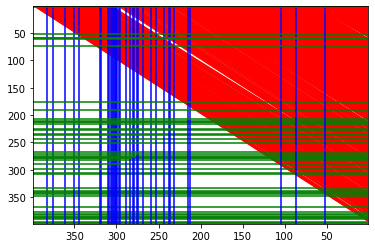

<Figure size 432x288 with 0 Axes>

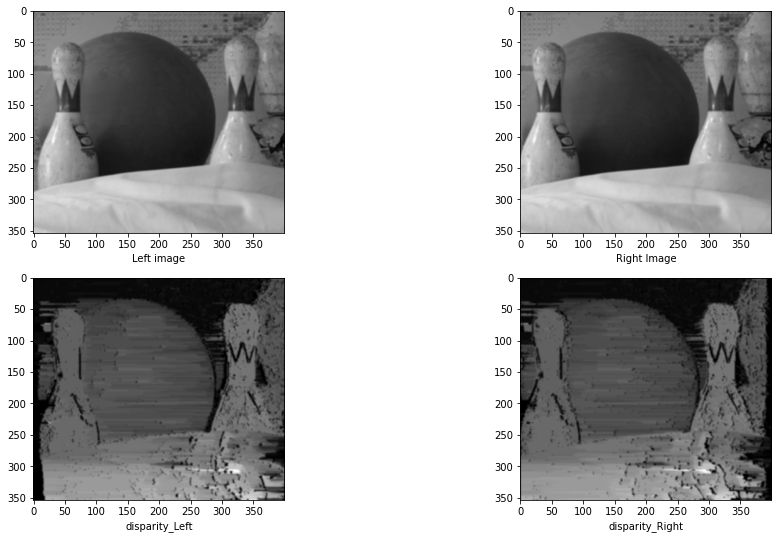

In [ ]:

img1,img2 = load_images('l.jpeg','r.jpeg')
#get_disparity(left,right,co)
disparity_Left,disparity_Right = get_disparity(img1,img2,1)
show_results(img1,img2,disparity_Left,disparity_Right)